# TMDB


#### Scarping

In [1]:
from bs4 import BeautifulSoup as bs4
import requests
import pandas as pd

In [2]:
header = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36 Edg/135.0.0.0"}

In [2]:
lst =[]

In [3]:
for i in range(1,10):
  res = requests.get(f"https://api.themoviedb.org/3/movie/popular?language=en-US&page={i}&region=AE&api_key=cac84b150991e136c7ebee84437567c5")
  #d = data.json()["results"]
  if res.status_code == 200:
    data = res.json()["results"]
    lst.extend(data)
  else:
    print("Invalid")

In [4]:
dff = pd.DataFrame(lst)
dff.head(3)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/44YfHklKam8COMUxDZop2Lnp0CS.jpg,"[28, 80, 53]",668489,en,Havoc,When a drug heist swerves lethally out of cont...,584.7785,/r46leE6PSzLR3pnVzaxx5Q30yUF.jpg,2025-04-25,Havoc,False,6.600,330
1,False,/fTrQsdMS2MUw00RnzH0r3JWHhts.jpg,"[28, 80, 53]",1197306,en,A Working Man,Levon Cade left behind a decorated military ca...,581.2791,/xUkUZ8eOnrOnnJAfusZUqKYZiDu.jpg,2025-03-27,A Working Man,False,6.442,498
2,False,/2Nti3gYAX513wvhp8IiLL6ZDyOm.jpg,"[10751, 35, 12, 14]",950387,en,A Minecraft Movie,Four misfits find themselves struggling with o...,408.6823,/iPPTGh2OXuIv6d7cwuoPkw8govp.jpg,2025-04-03,A Minecraft Movie,False,6.200,765


In [8]:
#Saving The CSV File
dff.to_csv("tmdb.csv")

#### Data Cleaning

In [5]:
dff.columns

Index(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'title', 'video', 'vote_average', 'vote_count'],
      dtype='object')

In [6]:
for i in dff.columns:
  print("column name:-",i)
  print(dff[i].value_counts())
  print("\n")

column name:- adult
False    180
Name: adult, dtype: int64


column name:- backdrop_path
/sNx1A3822kEbqeUxvo5A08o4N7o.jpg    2
/44YfHklKam8COMUxDZop2Lnp0CS.jpg    1
/p5ozvmdgsmbWe0H8Xk7Rc8SCwAB.jpg    1
/sCzcYW9h55WcesOqA12cgEr9Exw.jpg    1
/stTmJizMu8LklEIIkSu7NqHchdH.jpg    1
                                   ..
/5AhkjcqqRxBdpYZ0TeOuTCuOUYq.jpg    1
/qpPFF8Sed5lkXngWraJdN8WkwDG.jpg    1
/l2iY1AgqQ8dEa3FtWkN5TQ5aVbU.jpg    1
/oz4U9eA6ilYf1tyiVuGmkftdLac.jpg    1
/hqNspYtGVGuLDO15JORh44H7VOV.jpg    1
Name: backdrop_path, Length: 178, dtype: int64


column name:- genre_ids
[28, 12, 878]         7
[28, 53]              5
[27, 878]             5
[27, 53]              5
[10749, 18]           5
                     ..
[53, 35]              1
[10751, 14, 10749]    1
[27, 35, 878]         1
[18, 53, 9648]        1
[18, 53, 80]          1
Name: genre_ids, Length: 122, dtype: int64


column name:- id
1195506    2
668489     1
1022789    1
597        1
19053      1
          ..
429200     1
210

In [7]:
#Remove The column
dff = dff.drop(columns=["backdrop_path","poster_path"])

###### Check The O_title and title

In [8]:
#Match The Column
dff[dff["original_title"] != dff["title"]]

,adult,genre_ids,id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count
4,False,"[28, 53, 80, 18]",1276073,ja,新幹線大爆破,When panic erupts on a Tokyo-bound bullet trai...,326.4027,2025-04-23,Bullet Train Explosion,False,6.733,101
6,False,"[28, 53]",1225915,hi,ज्वेल थीफ: द हीस्ट बिगिन्स,"In this high-octane battle of wits and wills, ...",271.0703,2025-04-25,Jewel Thief: The Heist Begins,False,6.765,17
30,False,"[35, 10749]",1403735,te,లైలా,"Sonu Model, a renowned beautician from the old...",109.2595,2025-02-14,Laila,False,5.000,3
48,False,"[10749, 18]",1252309,es,Pídeme lo que quieras,"After his father's death, Eric Zimmerman trave...",73.9414,2024-11-29,Ask Me What You Want,False,5.931,152
53,False,[27],1321952,es,Tu Sangre,My mother vanished inside the boarding school ...,71.6696,2024-10-31,"Sofia, the Possession",False,7.429,7
66,False,"[10749, 18]",1010581,es,Culpa mía,"Noah must leave her city, boyfriend, and frien...",64.5658,2023-06-08,My Fault,False,7.817,3665
68,False,"[28, 12, 53]",1356039,es,Contraataque,When a hostage rescue mission creates a new en...,63.2033,2025-02-28,Counterattack,False,8.361,660
87,False,"[16, 28]",1297763,ja,ニンジャバットマン対ヤクザリーグ,The Batman family has returned to the present ...,56.1820,2025-03-17,Batman Ninja vs. Yakuza League,False,6.642,151
91,False,"[28, 53, 9648, 80]",1195430,hi,देवा,"Dev Ambre, a ruthless cop, loses his memory in...",52.7414,2025-01-31,Deva,False,6.111,45
99,False,"[16, 18, 10752]",1452267,ja,cocoon～ある夏の少女たちより～,San and Mayu are two schoolgirls living in Oki...,47.8462,2025-03-30,Cocoon: Aru Natsu no Shoujo-tachi yori,False,6.500,2


In [9]:
dff = dff.drop(columns=["original_title"])
dff.columns

Index(['adult', 'genre_ids', 'id', 'original_language', 'overview',
       'popularity', 'release_date', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [10]:
#Drop The Link Column
dff = dff.drop(columns=["video"])
dff.columns

Index(['adult', 'genre_ids', 'id', 'original_language', 'overview',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [11]:
dff["title"].value_counts()

Novocaine             2
Havoc                 1
Inside Out 2          1
Titanic               1
Valley Girl           1
                     ..
Good Time             1
The Breakfast Club    1
The Third Man         1
My Fault              1
The Kingdom           1
Name: title, Length: 179, dtype: int64

In [12]:
#Match The Duplicate Row
dff[(dff["title"] == "Cleaner") | (dff["title"] == "The Codes of War")]

,adult,genre_ids,id,original_language,overview,popularity,release_date,title,vote_average,vote_count
45,False,"[28, 53]",1125899,en,When a group of radical activists take over an...,73.5716,2025-02-19,Cleaner,6.607,234
57,False,"[28, 10752]",1373723,en,"War stories about family, ethics and honor inc...",63.8189,2025-03-20,The Codes of War,6.200,59


In [13]:
#### Drop The matched value
dff = dff.drop(index=[18,19])

In [14]:
for i in dff.columns:
  print(dff[i].value_counts())

False    178
Name: adult, dtype: int64
[28, 12, 878]         7
[28, 53]              5
[10749, 18]           5
[27, 53]              5
[28, 12, 53]          4
                     ..
[18, 14, 878]         1
[28, 12]              1
[53, 35]              1
[10751, 14, 10749]    1
[18, 53, 80]          1
Name: genre_ids, Length: 122, dtype: int64
668489     1
319        1
597        1
19053      1
450465     1
          ..
429200     1
2108       1
1092       1
1010581    1
1079311    1
Name: id, Length: 178, dtype: int64
en    142
es      9
ja      7
fr      4
hi      3
da      2
zh      2
te      1
de      1
nl      1
lv      1
ru      1
ta      1
ml      1
pl      1
ko      1
Name: original_language, dtype: int64
When a drug heist swerves lethally out of control, a jaded cop fights his way through a corrupt city's criminal underworld to save a politician's son.                                                                                                                               

In [15]:
#Change The DataType Object To DateTime
dff["release_date"] = pd.to_datetime(dff["release_date"])

In [16]:
dff_new = dff[dff["release_date"].dt.year > 1990]
dff_new.columns

Index(['adult', 'genre_ids', 'id', 'original_language', 'overview',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [22]:
#Saving Cleaned CSV File
dff.to_csv("tmdb_cleaned.csv")

#### Data Visualization

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

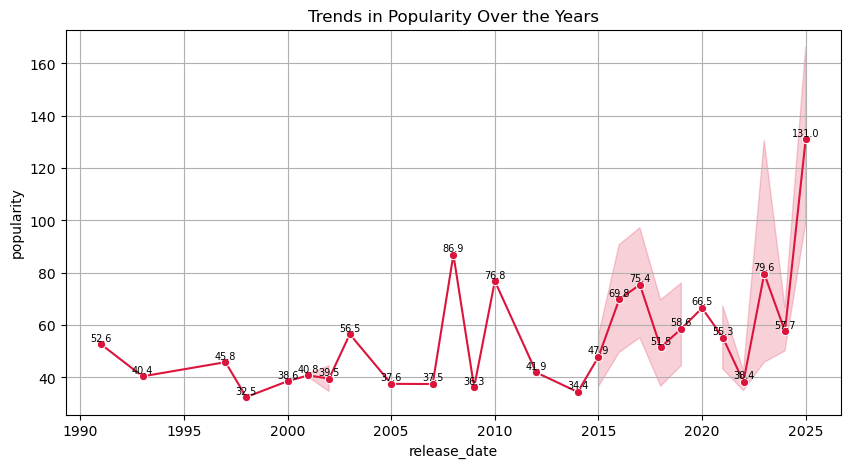

In [18]:
plt.figure(figsize=(10,5))
plt.title("Trends in Popularity Over the Years")
ax =sns.lineplot(x=dff_new["release_date"].dt.year,y=dff_new["popularity"],marker="o",color = "#DC143C",data=dff_new)
plt.grid(True)

for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y + 0.5, f"{y:.1f}", ha='center', va='bottom', fontsize=7,color="#000000")

plt.show()

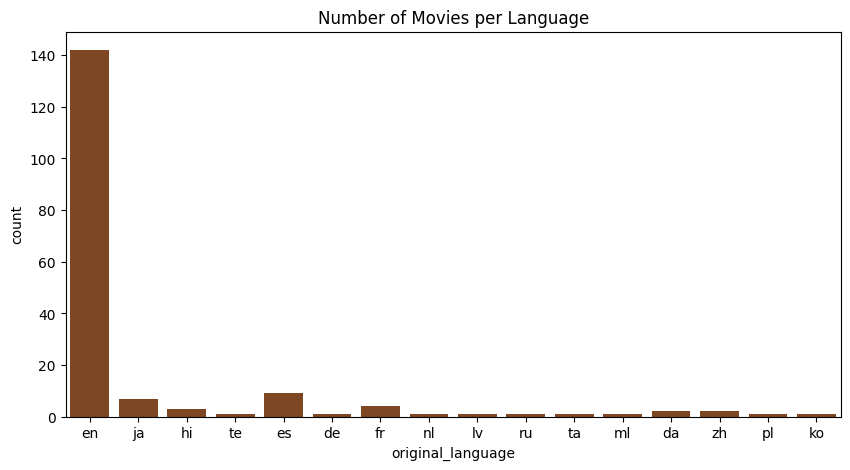

In [53]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies per Language")
sns.countplot(x=dff["original_language"],color="#8B4513")
plt.show()

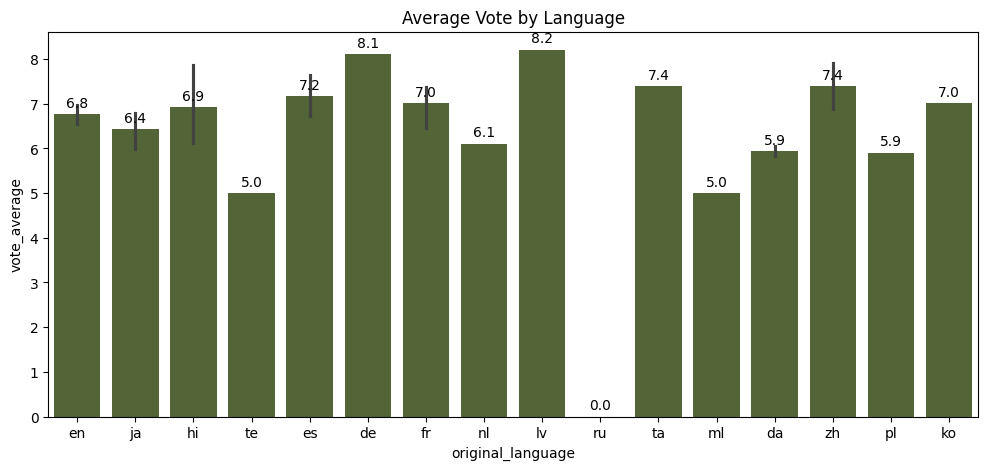

In [65]:
plt.figure(figsize=(12,5))
plt.title("Average Vote by Language")
ax = sns.barplot(x=dff["original_language"],y=dff["vote_average"],color="#556B2F")

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)
plt.show()

#### Text File Creation

In [49]:
dff.to_csv("/content/movies_data.txt",sep ="\t",index = False)